In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_file = os.path.join('D:', os.path.sep, 'prg', 'Datasets', 'general', 'heart_uc.csv')

In [3]:
df = pd.read_csv(data_file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
df['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

**All targets with values ​​greater than 1, intentionally are converted to one**

In [5]:
%%time
df['target'] = df['target'].apply(lambda d:1 if d>=1 else 0)

CPU times: total: 0 ns
Wall time: 3.83 ms


In [6]:
print(df['target'].value_counts())

0    164
1    139
Name: target, dtype: int64


In [7]:
df.groupby('sex')['target'].mean()

sex
0    0.257732
1    0.553398
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='count'>

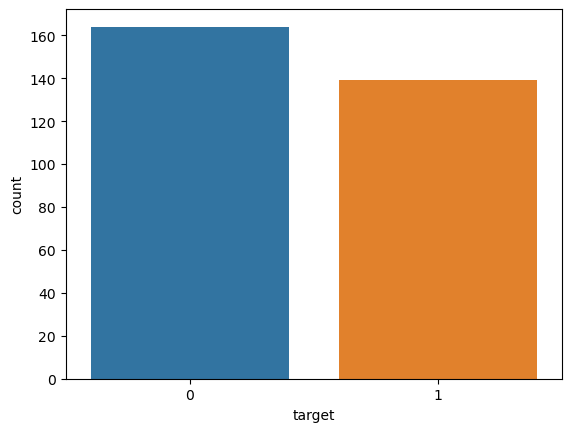

In [8]:
sns.countplot(data=df, x='target')

<Axes: xlabel='sex', ylabel='count'>

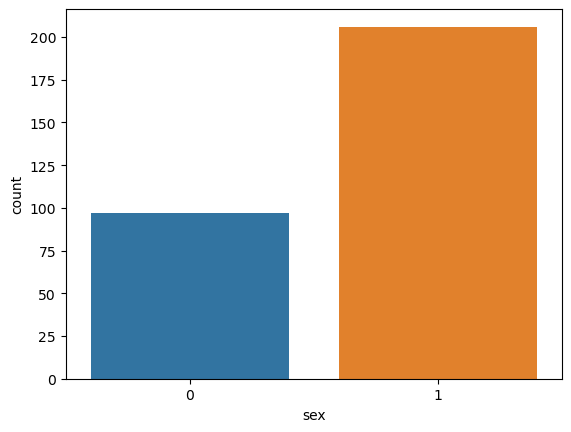

In [9]:
sns.countplot(data=df, x='sex')

<Axes: >

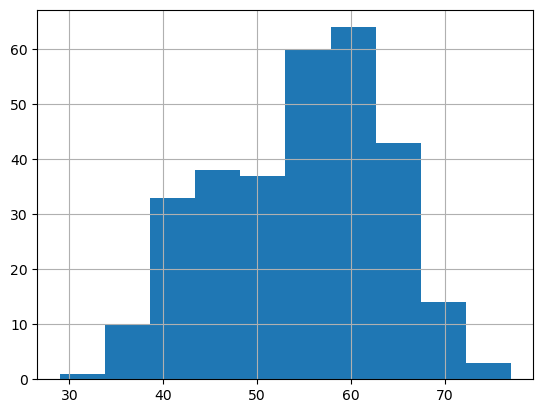

In [10]:
df['age'].hist()

In [11]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
target      False
dtype: bool

<Axes: >

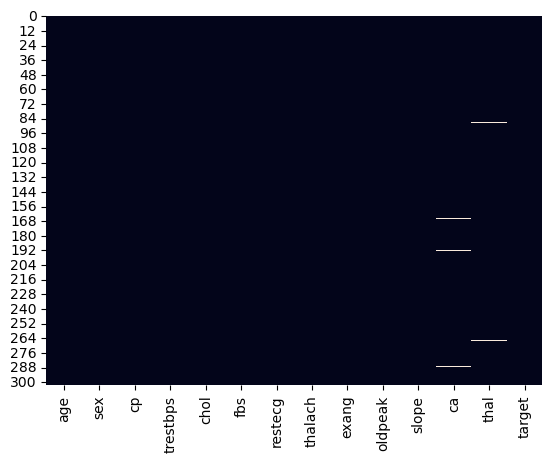

In [12]:
sns.heatmap(df.isna(), cbar=False)

**Note: Fill Null Values with column mean**

In [13]:
df['ca'].fillna(df['ca'].mean(), inplace=True)
df['thal'].fillna(df['thal'].mean(), inplace=True)

In [14]:
df.isnull().any().sum()

0

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
X.shape

(303, 13)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [49]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.77      0.59      0.67        17

    accuracy                           0.68        31
   macro avg       0.69      0.69      0.68        31
weighted avg       0.70      0.68      0.68        31



In [52]:
print(confusion_matrix(y_test, y_pred))

[[11  3]
 [ 7 10]]


In [59]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69        14
           1       0.80      0.47      0.59        17

    accuracy                           0.65        31
   macro avg       0.69      0.66      0.64        31
weighted avg       0.70      0.65      0.63        31



In [60]:
from sklearn.svm import SVC

In [61]:
model = SVC(C=13, kernel='linear', random_state=101)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.82      0.90        17

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



## Grid Search for hyper-parameter optimisation

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [70]:
params = {
    'C' : np.arange(0, 20, 0.5),
    'kernel': ['linear', 'rbf', 'polynomial'],
    'gamma': ['auto', 0.1, 0.2, 0.3]
    }
# Calculate 40 x 3 x 4 = 1200 states

In [71]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=params, scoring='f1', cv=4, n_jobs=1, verbose=10)

In [72]:
%%time
grid_search.fit(X, y)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits
[CV 1/4; 1/480] START C=0.0, gamma=auto, kernel=linear..........................
[CV 1/4; 1/480] END C=0.0, gamma=auto, kernel=linear;, score=nan total time=   0.0s
[CV 2/4; 1/480] START C=0.0, gamma=auto, kernel=linear..........................
[CV 2/4; 1/480] END C=0.0, gamma=auto, kernel=linear;, score=nan total time=   0.0s
[CV 3/4; 1/480] START C=0.0, gamma=auto, kernel=linear..........................
[CV 3/4; 1/480] END C=0.0, gamma=auto, kernel=linear;, score=nan total time=   0.0s
[CV 4/4; 1/480] START C=0.0, gamma=auto, kernel=linear..........................
[CV 4/4; 1/480] END C=0.0, gamma=auto, kernel=linear;, score=nan total time=   0.0s
[CV 1/4; 2/480] START C=0.0, gamma=auto, kernel=rbf.............................
[CV 1/4; 2/480] END C=0.0, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 2/4; 2/480] START C=0.0, gamma=auto, kernel=rbf.............................
[CV 2/4; 2/480] END C=0.0, gamma=

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
672 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-packages\sk

CPU times: total: 13min 4s
Wall time: 13min 6s


GridSearchCV(cv=4, estimator=SVC(), n_jobs=1,
             param_grid={'C': array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
                         'gamma': ['auto', 0.1, 0.2, 0.3],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=10)

In [73]:
grid_search.best_score_

0.8382456140350877

In [74]:
grid_search.best_estimator_

SVC(C=7.5, gamma='auto', kernel='linear')

In [75]:
# grid search metric = accuracy
model = SVC(C=0.5, kernel='linear', gamma='auto', random_state=101)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.82      0.90        17

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



In [76]:
model = SVC(C=7.5, kernel='linear', gamma='auto', random_state=101)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.76      0.87        17

    accuracy                           0.87        31
   macro avg       0.89      0.88      0.87        31
weighted avg       0.90      0.87      0.87        31



In [87]:
rand_search = RandomizedSearchCV(estimator=SVC(), param_distributions=params, scoring='f1', cv=4, n_jobs=1, verbose=10)

In [88]:
%%time
rand_search.fit(X, y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4; 1/10] START C=3.0, gamma=auto, kernel=linear...........................
[CV 1/4; 1/10] END C=3.0, gamma=auto, kernel=linear;, score=0.836 total time=   0.5s
[CV 2/4; 1/10] START C=3.0, gamma=auto, kernel=linear...........................
[CV 2/4; 1/10] END C=3.0, gamma=auto, kernel=linear;, score=0.873 total time=   0.1s
[CV 3/4; 1/10] START C=3.0, gamma=auto, kernel=linear...........................
[CV 3/4; 1/10] END C=3.0, gamma=auto, kernel=linear;, score=0.763 total time=   0.1s
[CV 4/4; 1/10] START C=3.0, gamma=auto, kernel=linear...........................
[CV 4/4; 1/10] END C=3.0, gamma=auto, kernel=linear;, score=0.787 total time=   0.3s
[CV 1/4; 2/10] START C=17.0, gamma=0.3, kernel=linear...........................
[CV 1/4; 2/10] END C=17.0, gamma=0.3, kernel=linear;, score=0.824 total time=   1.3s
[CV 2/4; 2/10] START C=17.0, gamma=0.3, kernel=linear...........................
[CV 2/4; 2/10] END C=17.0, g

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklea

CPU times: total: 13.1 s
Wall time: 13.1 s


RandomizedSearchCV(cv=4, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
                                        'gamma': ['auto', 0.1, 0.2, 0.3],
                                        'kernel': ['linear', 'rbf',
                                                   'polynomial']},
                   scoring='f1', verbose=10)

In [91]:
rand_search.best_score_

0.814775868195147

In [92]:
rand_search.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'C': 3.0}

In [93]:
# grid search metric = f1
model = SVC(C=3.5, kernel='linear', gamma='auto', random_state=101)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.76      0.87        17

    accuracy                           0.87        31
   macro avg       0.89      0.88      0.87        31
weighted avg       0.90      0.87      0.87        31

